<a href="https://colab.research.google.com/github/dvpbwxwx/GoBike-Rent-Data-Analysis/blob/main/GoBike_Rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Project: GoBike Rent Bike Sharing Dataset
---
- Name: David Rian Prabowo
- Email: davidrianprabowo29@gmail.com
- ID Dicoding: david_rian29

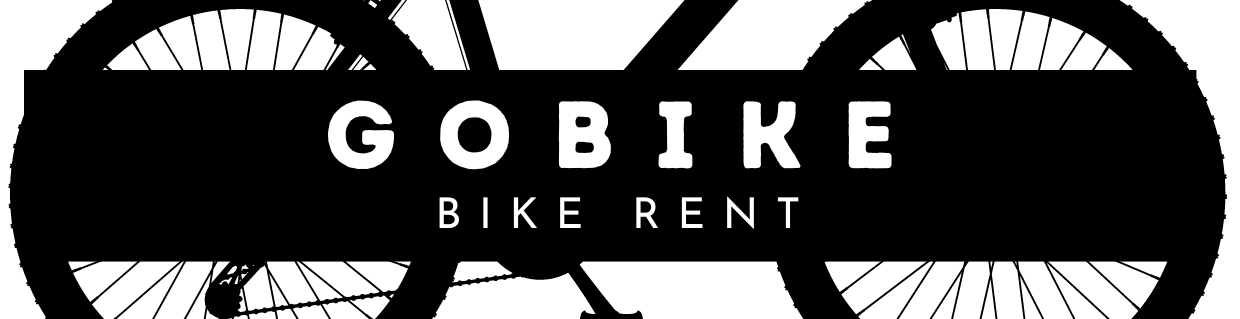

## 1. Project Introduction
---

### A. Background

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return  back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return  back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of  over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,  environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

### B. Data Set

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data.

The data is aggregated on hourly then extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.

## 2. Defining Business Questions
---

1. How is the trend in the number of bike-sharing rides in recent years?
2. What is the usage pattern of bike-sharing rides based on time of day?
3. What season has the highest bike-sharing rides?
4. What is the usage pattern of bike-sharing rides based on day of the week?
5. Are there any correlations between temperatures that indicate conditions when bike-sharing rides are high?
6. Does weather affect bikeshare usage?

## 3. Import the Libraries
---

Import the required library for data manipulation, data analysis and data visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 4. Data Wrangling
---

### A. Gathering Data

Load the dataset. For easier use of the dataset I upload the dataset to github, so it can load independently without using local access.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/fikrionii/Dicoding-Bike-Sharing/main/dataset/hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Dataset Dictionary

---


- instant: record index
	- dteday : date
	- season : season (1:winter, 2:spring, 3:summer, 4:fall)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed in miles per hour. The values are divided to 67 (max)
	- casual: count of casual user rides
	- registered: count of registered user rides
	- cnt: count of total rental bike rides including both casual and registered

### B. Assessing Data

Several techniques is perfomed to check the characteristics of the data, i.e check for duplicated values, check for missing values, check for inaccurate values, etc.

### Check for Data Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- We will convert the `dteday` variable to date data type
- The `season`, `weekday`, and `mnth` variables are represented in integer, we will change them into their respective string values.
- The `yr` variable are represented as 0 for year 2011 and 1 for year 2012. We will change them to their respective values.

### Check for Missing Values

In [ ]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Apparently there are no missing values in the dataset

### Check for Duplicated Values

In [ ]:
df.duplicated().sum()

0

Apparently there are no duplicated values in the dataset

### Check Statistical Summary

In [ ]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [ ]:
print(df.shape)

(17379, 17)


- The dataset consists of 17379 rows and 17 columns
- As explained in the dataset dictionary, the variables `temp`, `atemp`, `hum` and `windspeed` are normalized. To gain better understanding of the real life condition, we will corrected these values to before normalized.

### Assessing Data Summary

- Convert `dteday` variable to date data type
- The `season`, `weekday`, and `mnth` variables are represented in integer, we will change them into their respective string values.
- The `yr` variable are represented as 0 for year 2011 and 1 for year 2012. We will change them to their respective values.
- As explained in the dataset dictionary, the variables `temp`, `atemp`, `hum` and `windspeed` are normalized. To gain better understanding of the real life condition, we will corrected these values to before normalized.

### C. Cleaning Data

Perform data cleaning based on findings in data assessment

### Convert `dteday` data type

In [ ]:
# convert dteday variable ot date data type
df['dteday'] = pd.to_datetime(df['dteday'])

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Correct the values of `season`, `weekday` and `month` variables

In [ ]:
# find the weekday of each corresponding date
df['weekday'] = df['dteday'].dt.day_name()

In [ ]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [ ]:
# find the month of each corresponding date
df['mnth'] = df['dteday'].dt.month_name()

In [ ]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [ ]:
# replace season integer value with each corresponding season
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in df['season']:
    season = find_season(season)
    season_list.append(season)

df['season'] = season_list

In [ ]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


### Correct the values of `yr` variable

In [ ]:
df['yr'] = df['dteday'].dt.year

In [ ]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


### Correct the values of `temp`, `atemp`, `hum`, and `windspeed` to before normalized

In [ ]:
df['temp'] = df['temp']*41
df['atemp'] = df['atemp']*50
df['hum'] = df['hum']*100
df['windspeed'] = df['windspeed']*67

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


### Save the cleaned dataset

After we cleaned the dataset, it is good practice to save it for easier use in the future

In [ ]:
df.to_csv("cleaned_bikeshare_hour.csv", index=False)

## 5. Exploratory Data Analysis
---

In [ ]:
df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,object
yr,int32
mnth,object
hr,int64
holiday,int64
weekday,object
workingday,int64
weathersit,int64


### A. Univariate Analysis

### Histogram

In [ ]:
# extract the 4 float variables
float_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_float = df[float_vars]

df_float.describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


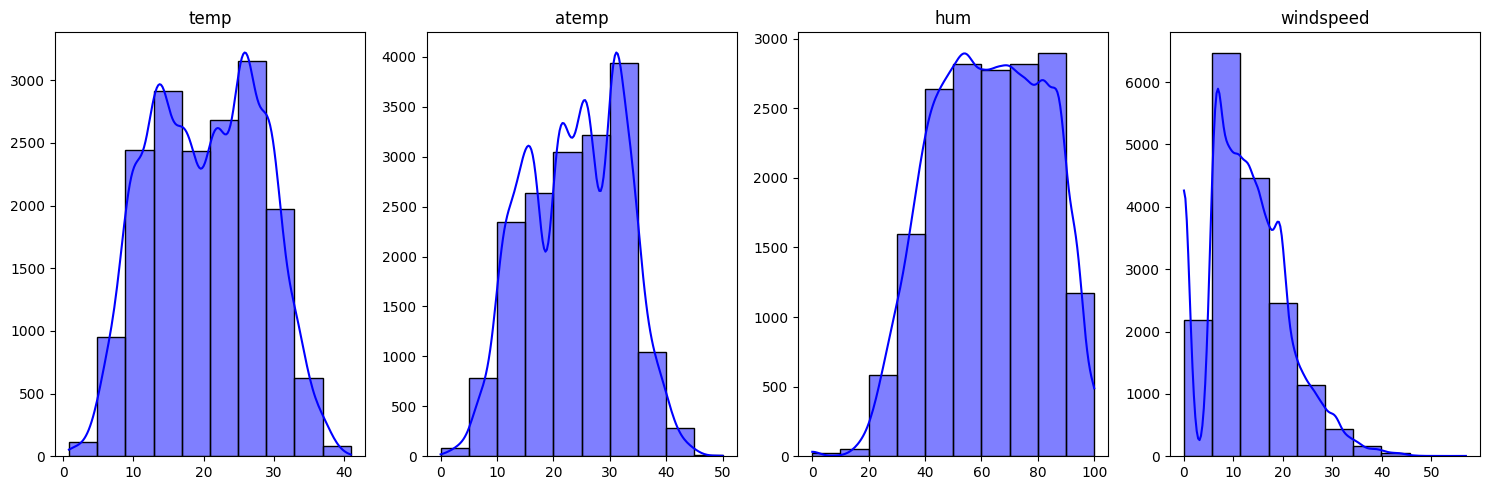

In [ ]:
# create a figure and 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(15,5))

# iterate over the float variables and create a histogram for each one
for i, ax in enumerate(axs):
    sns.histplot(x=df_float[float_vars[i]], ax=ax, kde=True, bins=10, color='blue')

    # set the title and labels
    ax.set_title(float_vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

# adjust the layout of the subplots
plt.tight_layout()

plt.show()

### Boxplot

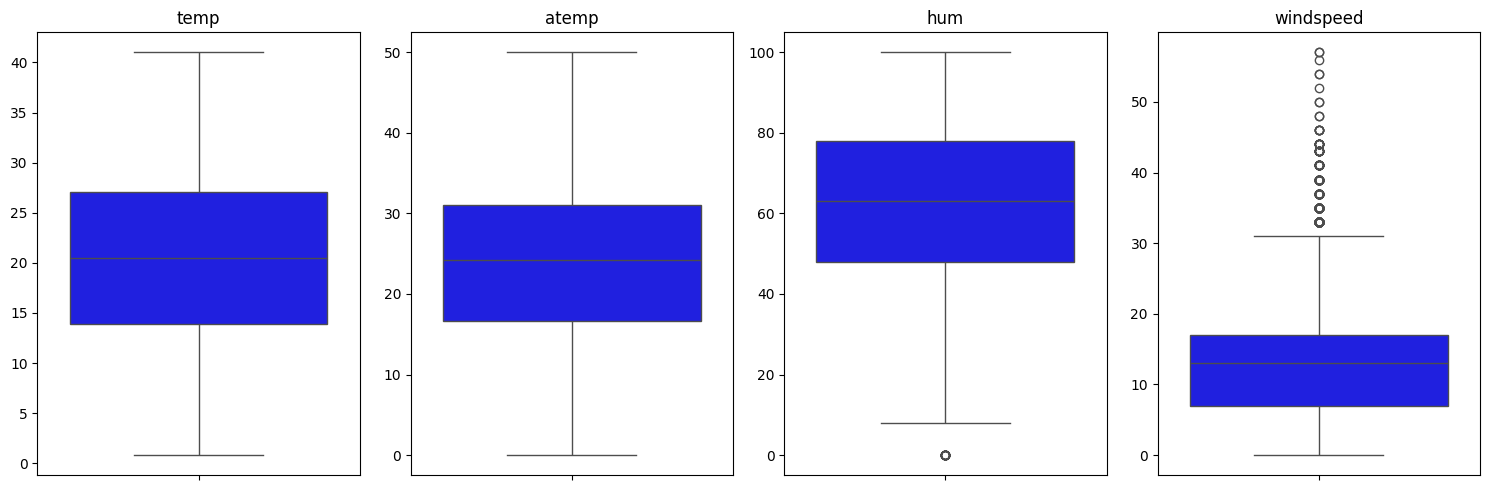

In [ ]:
# Create a figure and 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Iterate over the float variables and create a boxplot for each one
for i, ax in enumerate(axs):
    sns.boxplot(y=df_float[float_vars[i]], orient='v', ax=ax, color='blue')

    # Set the title and labels
    ax.set_title(float_vars[i])
    ax.set_ylabel("")

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

### Histogram and Boxplot of bike-share users

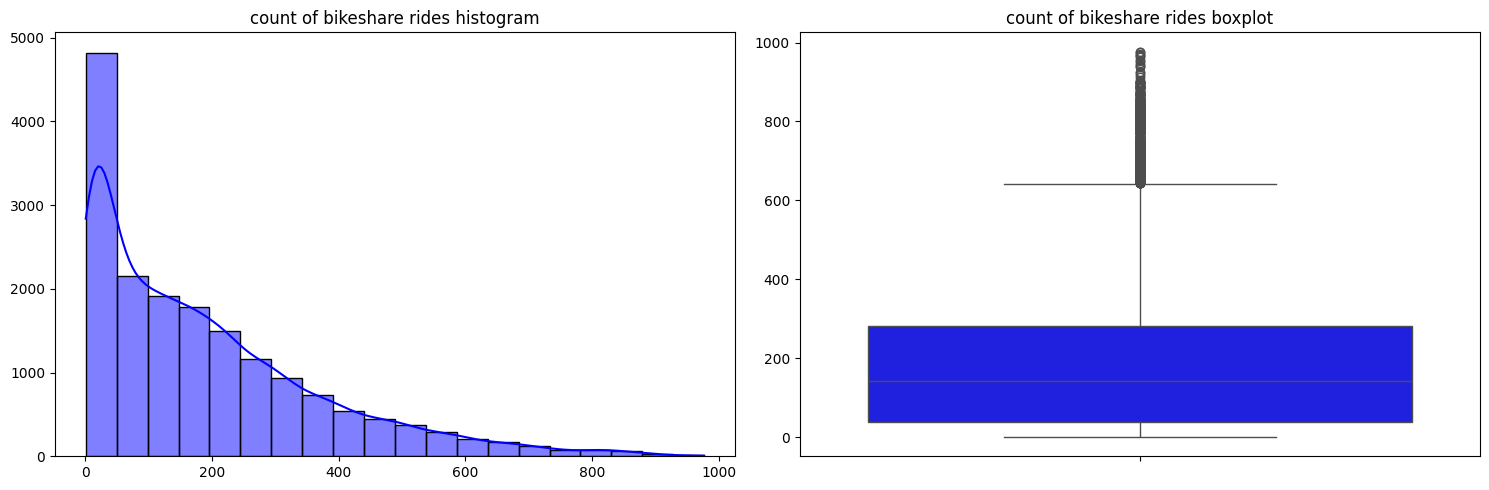

In [ ]:
# Create a figure and 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))


sns.histplot(df['cnt'], kde=True, bins=20, ax = axs[0], color='blue')
axs[0].set_title("count of bikeshare rides histogram")
axs[0].set_xlabel("")
axs[0].set_ylabel("")

sns.boxplot(y=df['cnt'], ax = axs[1], color='blue')
axs[1].set_title("count of bikeshare rides boxplot")
axs[1].set_xlabel("")
axs[1].set_ylabel("")


# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

- Histogram for `temp`, `atemp`, and `hum` shows normal distribution, while for `windspeed` is right-skewed. We also can deduce this by observing the value of mean and median in each variable.
- Boxplot for `temp`, `atemp`, and `hum` shows no outliers, while for `windspeed` outliers were observed.
- Histogram for count if bikeshare rides is right-skewed. There are also outliers observed in the boxplot.
- While there are outliers in `windspeed` variable, we see that the maximum value of 57 mph, and it is not an anomaly and may happen in real life. So we won't remove the outliers in this case.
- Similar to `windspeed`, the outliers won't be removed as it maybe possible there are days with extremely high count of rides.

### B. Multivariate Analysis

### Count the number of casual and registered users

<ipython-input-29-ade4339dd8fb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Registered", "Casual"], y=[registered_sum, casual_sum],  palette=["blue", "lightblue"])


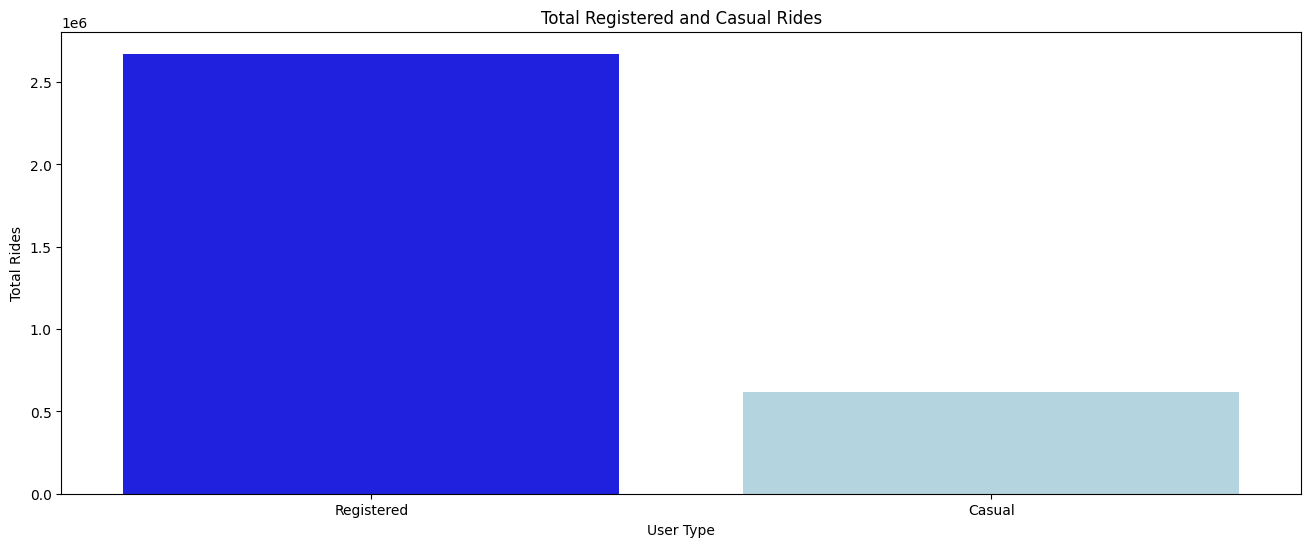

Count of registered users: 2672662
Count of casual users: 620017


In [ ]:
registered_sum = df['registered'].sum()
casual_sum = df['casual'].sum()

plt.figure(figsize=(16,6))

# Create a bar chart using the plt.bar() function
sns.barplot(x=["Registered", "Casual"], y=[registered_sum, casual_sum],  palette=["blue", "lightblue"])

# Add labels and a title to the plot
plt.xlabel("User Type")
plt.ylabel("Total Rides")
plt.title("Total Registered and Casual Rides")

# Show the plot
plt.show()

print(f"Count of registered users: {registered_sum}")
print(f"Count of casual users: {casual_sum}")

The number of registered bikeshare users are higher than higher than casual users

### Time series plot of bikeshare users

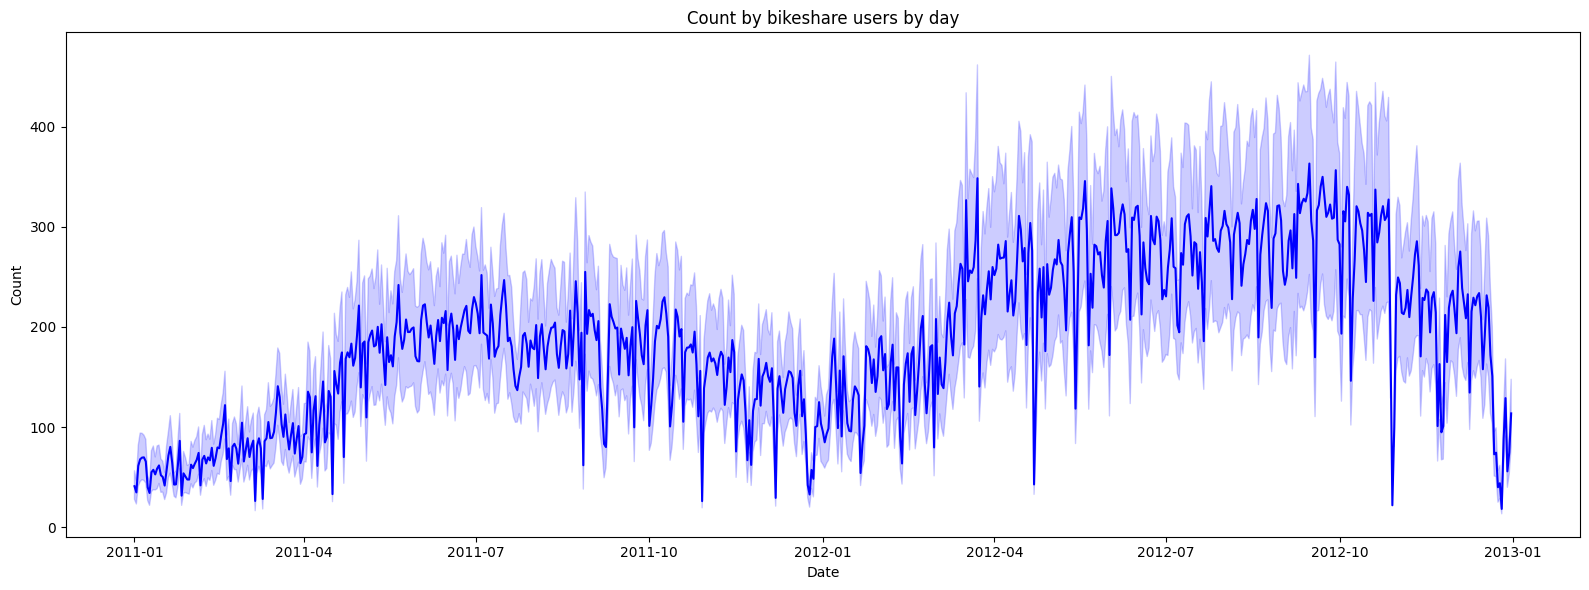

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="cnt", data=df, color='blue')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count by bikeshare users by day")

# Show the plot
plt.tight_layout()
plt.show()

- The count of rides starts low in the beginning of each year, then starts to increase in the middle of the year, then decreased nearing the end of each year.
- The number of users seems higher in 2012 than in 2011.

### Boxplot of bikeshare users by type

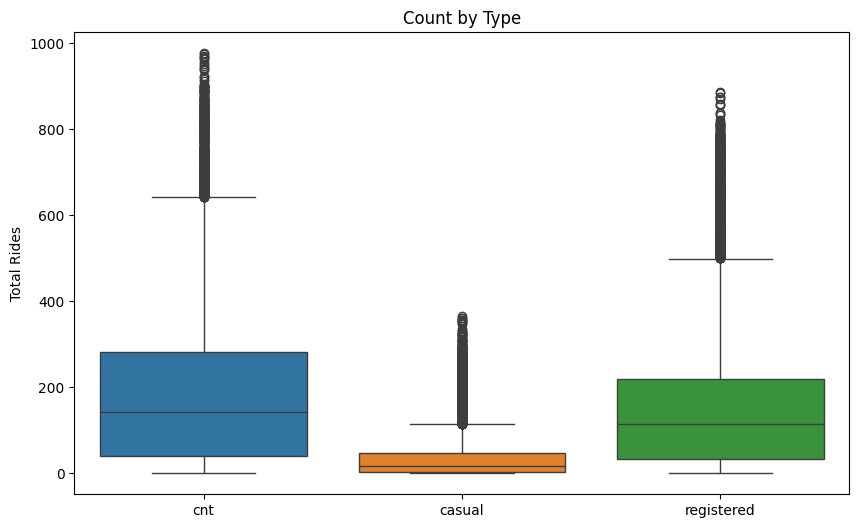

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df[['cnt', 'casual', 'registered']])

# Add labels and a title to the plot
plt.ylabel("Total Rides")
plt.title("Count by Type")

# Show the plot
plt.show()

The count of bikeshare rides vary by membership; count of registered bikeshare rides are higher than casual

### Boxplot of bikeshare users by year

<ipython-input-32-785fca51eb9d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


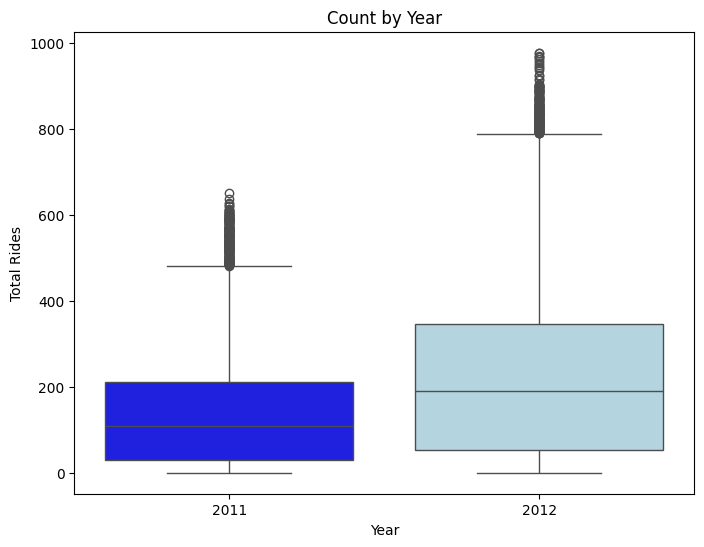

In [ ]:
plt.figure(figsize=(8,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="yr",
    y="cnt",
    data=df,
    palette=["blue", "lightblue"]
)

# Add labels and a title to the plot
plt.xlabel("Year")
plt.ylabel("Total Rides")
plt.title("Count by Year")

# Show the plot
plt.show()

As previously seen in the line chart, and confirmed by this boxplot, the number of bikeshare rides in 2012 are higher than in 2011.

### Boxplots of bikeshare users by season

<ipython-input-34-c6e57493a6d2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-34-c6e57493a6d2>:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


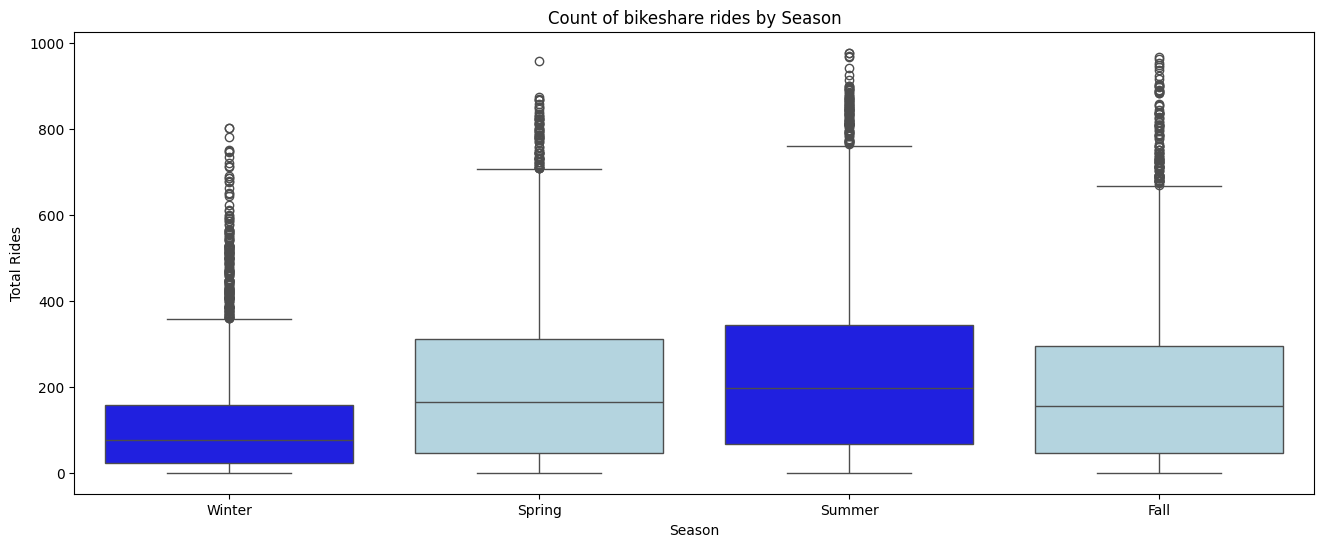

In [ ]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="season",
    y="cnt",
    data=df,
    palette=["blue", "lightblue"]
)

# Add labels and a title to the plot
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

# Show the plot
plt.show()

The count of bikeshare rides are the lowest in winter, and the highest in summer.

### Boxplots of bikeshare users by month

<ipython-input-35-b5a1f7d8de4c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-35-b5a1f7d8de4c>:4: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


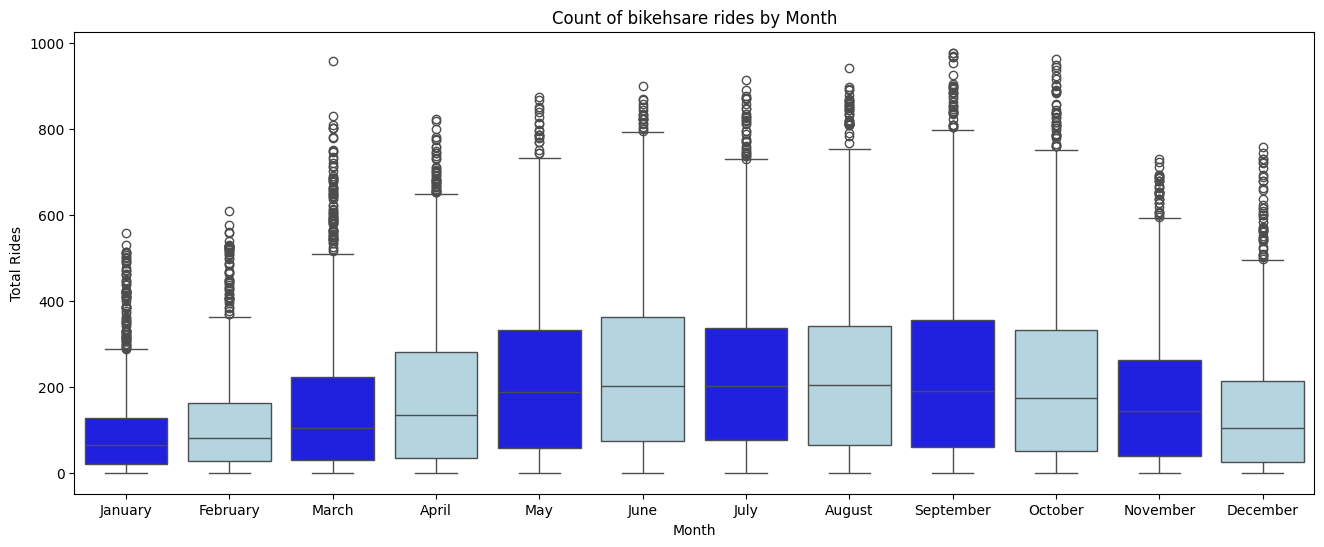

In [ ]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="mnth",
    y="cnt",
    data=df,
    palette=["blue", "lightblue"]
)

# Add labels and a title to the plot
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Count of bikehsare rides by Month")

# Show the plot
plt.show()

As previously seen in the line chart, and confirmed by this boxplot, the number of bikeshare rides tend to increase in the middle of the year, and decreased in the beginning the year (January and February) and in the end of the year (November and December)

### Boxplots of bikeshare users by weekday

In [ ]:
# order the day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

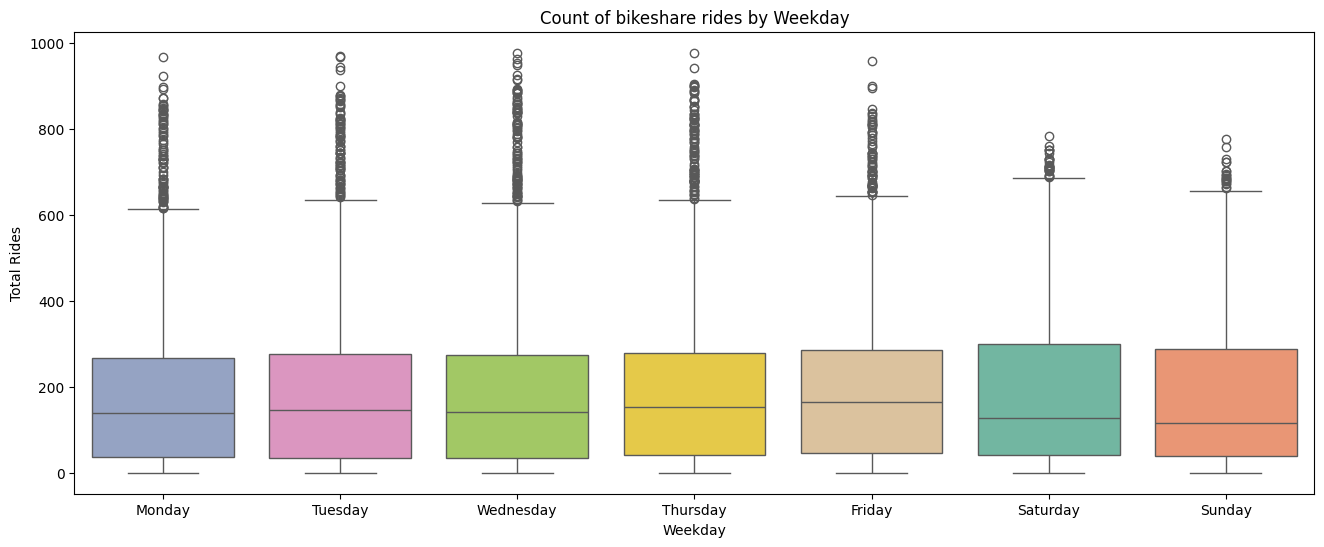

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="weekday",
    y="cnt",
    data=df,
    palette=sns.color_palette("Set2", n_colors=len(day_order)),  # Use a palette with enough colors
    order=day_order,
    hue='weekday',  # Assign hue to match the x variable
    legend=False  # Disable legend if not needed
)

# Add labels and a title to the plot
plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weekday")

# Show the plot
plt.show()


- The boxplots shows quite similar number of rides in every weekday
- There are less outliers in Saturday and Sunday compared to other days

### Boxplots of bikeshare users by hour

---

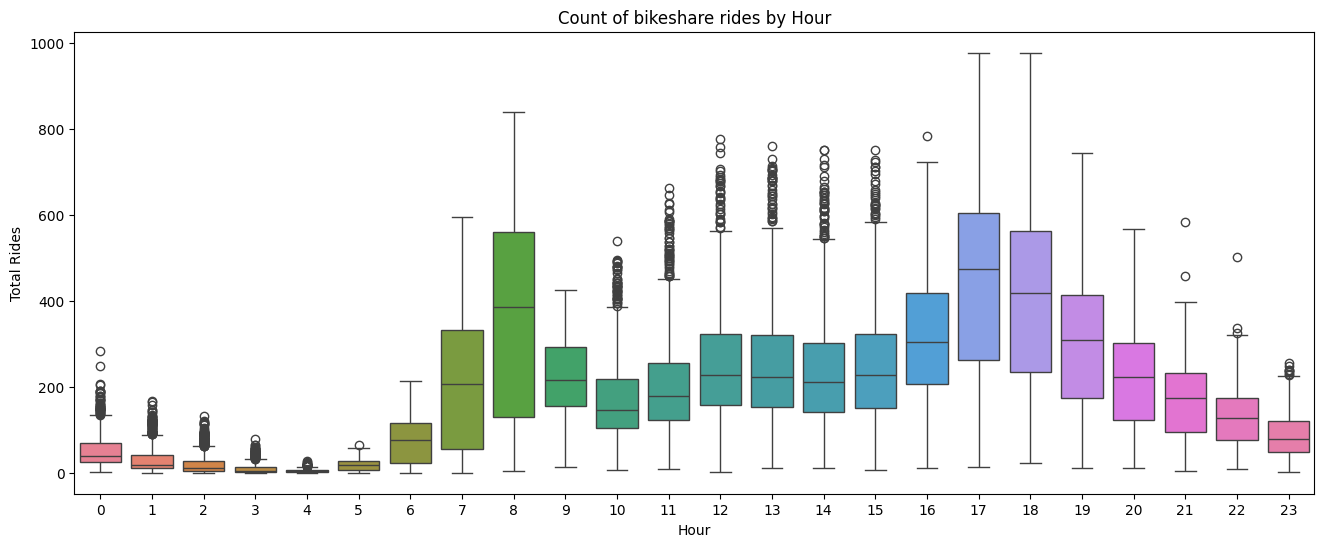

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="hr",
    y="cnt",
    data=df,
    palette=sns.color_palette("husl", n_colors=df['hr'].nunique()),  # Use a palette with enough colors
    hue="hr",  # Assign hue to match the x variable
    legend=False  # Disable legend if not needed
)

# Add labels and a title to the plot
plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Hour")

# Show the plot
plt.show()


- From midnight to dawn, the number of bikeshare rides are the lowest
- It begin to increase in the morning, and reach its peak in 8.00
- It begin to decrease again during the day, but starting in 16.00 it begin to increase again and reach its peak again in 17.00
- After that the number of bikeshare rides decreased throughout the night

### Boxplots of bikeshare users by holiday

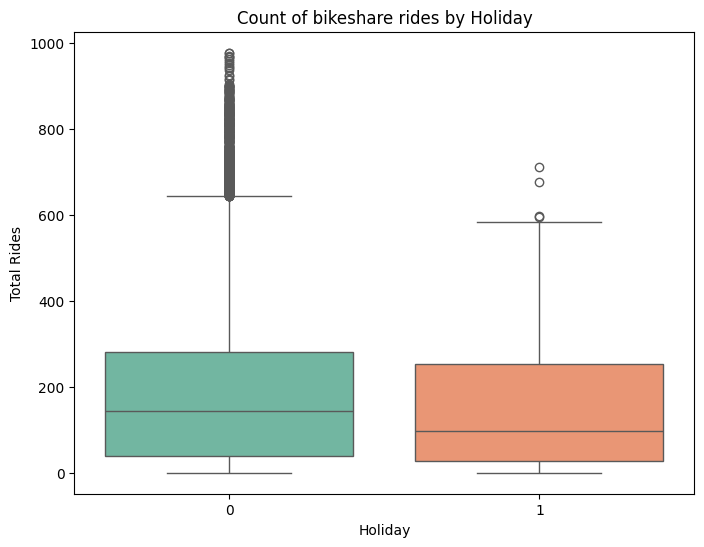

Count of bikeshare users based on holiday:
holiday
0    16879
1      500
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="holiday",
    y="cnt",
    data=df,
    palette=sns.color_palette("Set2", n_colors=df['holiday'].nunique()),  # Use a palette with enough colors
    hue="holiday",  # Assign hue to the same variable as x
    legend=False  # Disable legend if not needed
)

# Add labels and a title to the plot
plt.xlabel("Holiday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Holiday")

# Show the plot
plt.show()

# Print the count of bikeshare users based on holiday
print('Count of bikeshare users based on holiday:')
print(df['holiday'].value_counts())



Count of bikeshare rides on non-holiday are higher than on holiday, though it's understandable since day of holiday are less than day of non-holiday

### Boxplots of bikeshare users by workingday

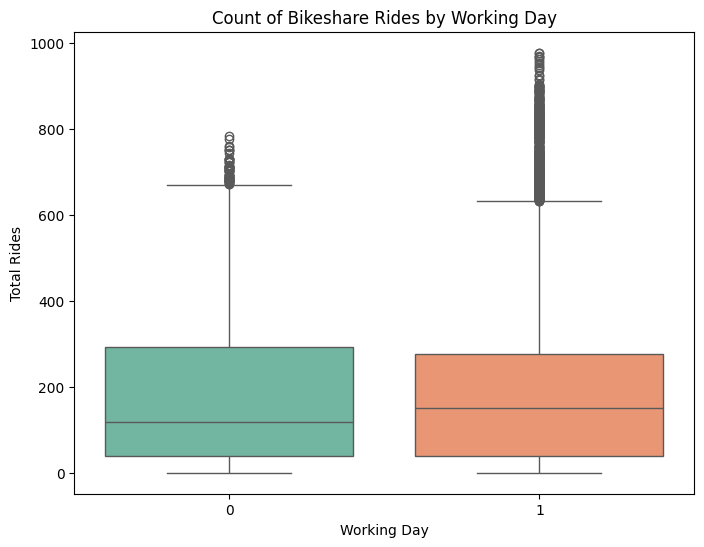

Count of bikeshare users based on working day:
workingday
1    11865
0     5514
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="workingday",
    y="cnt",
    data=df,
    palette=sns.color_palette("Set2", n_colors=df['workingday'].nunique()),  # Use a palette with enough colors
    hue="workingday",  # Assign hue to the same variable as x
    legend=False  # Disable legend if not needed
)

# Add labels and a title to the plot
plt.xlabel("Working Day")
plt.ylabel("Total Rides")
plt.title("Count of Bikeshare Rides by Working Day")

# Show the plot
plt.show()

# Print the count of bikeshare users based on working day
print('Count of bikeshare users based on working day:')
print(df['workingday'].value_counts())


Count of bikeshare rides on working day are higher than on holiday, though it's understandable since day of holiday and weekends are less than day of working day

### Scatterplot of temperature, feeling temperature, humidity. and windspeed vs. count of bikeshare users

In [ ]:
# extract the variables for scatterplot
scatter_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
df_scatter = df[scatter_vars]

df_scatter.head(3)

,cnt,temp,atemp,hum,windspeed
0,16,9.84,14.395,81.0,0.0
1,40,9.02,13.635,80.0,0.0
2,32,9.02,13.635,80.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int32         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

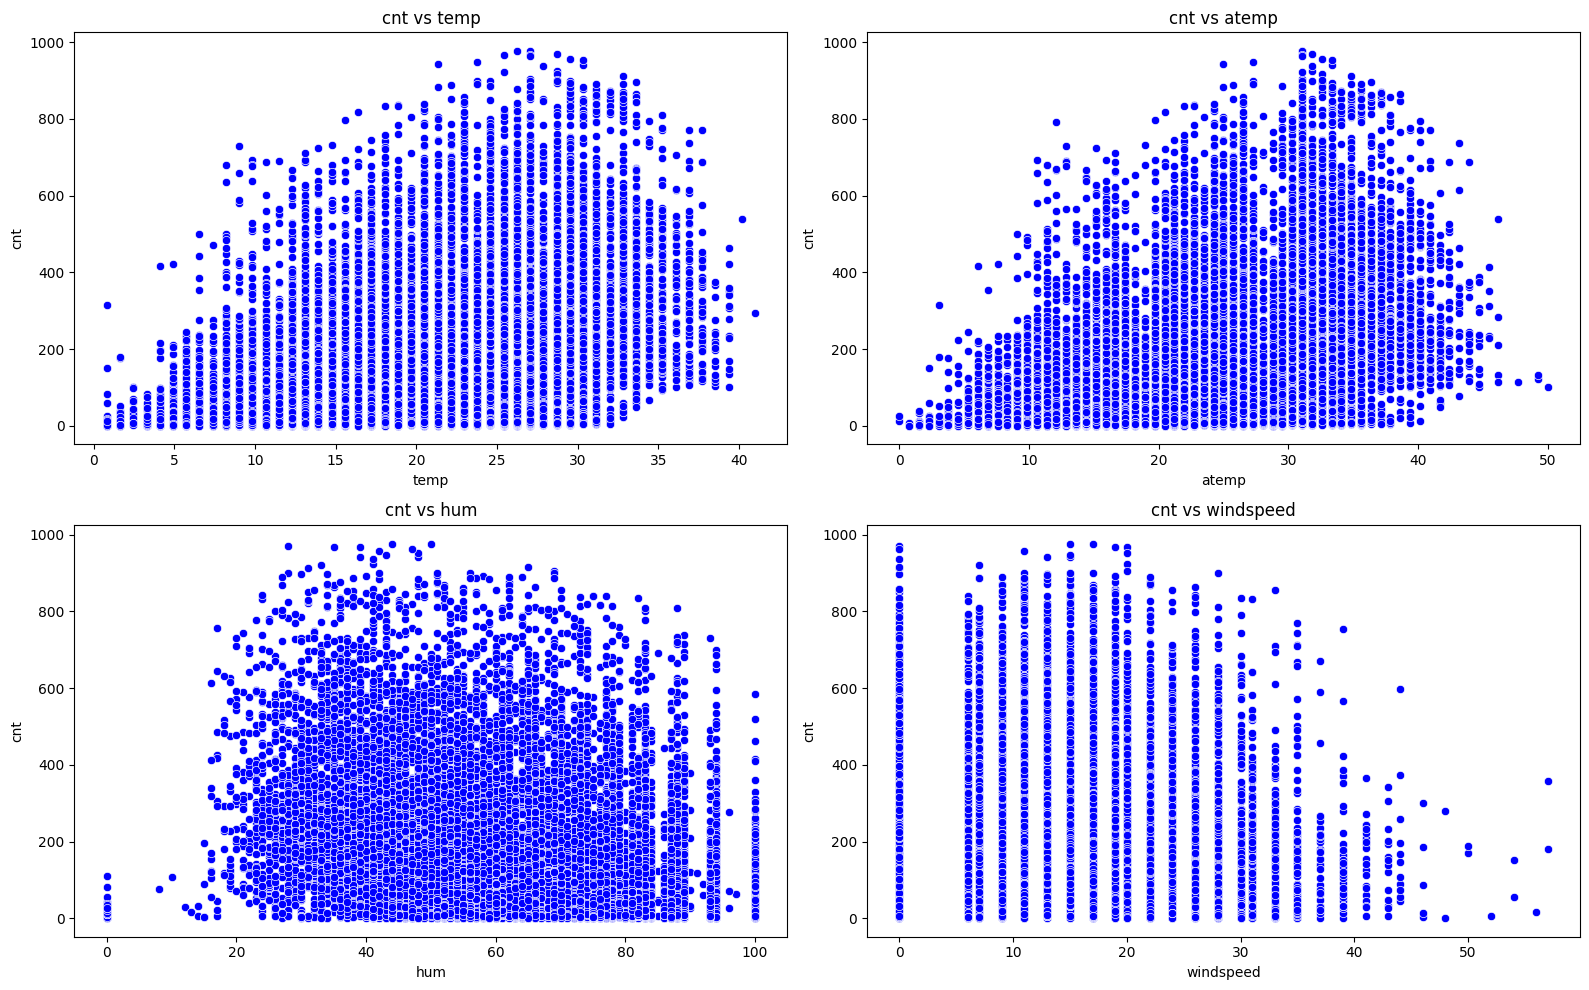

In [ ]:
# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Iterate over the other variables and create a scatterplot for each one
for i, col in enumerate(df.columns[10:14]):
    sns.scatterplot(x=col, y='cnt', data=df, ax=axs[i // 2, i % 2], color='blue')
    axs[i // 2, i % 2].set_title(f'cnt vs {col}')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

- The scatter plot of cnt vs. temp and cnt vs. atemp shows that the count of bikeshare rides increased as the temperature increase. It seems like there is a correlation between temperature and count of bikeshare rides.
- The scatter plot of hum vs. cnt shows no correlation.
- The scatter plot of cnt vs. windspeed shows that the count of bikeshare rides seems to decrease as the windspeed increase.

### Correlation and Correlation Heat Map

In [ ]:
df.corr(numeric_only=True)

,instant,yr,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866014,-0.004775,0.014723,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
yr,0.866014,1.000000,-0.003867,0.006692,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
hr,-0.004775,-0.003867,1.000000,0.000479,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.006692,0.000479,1.000000,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
workingday,-0.003416,-0.002196,0.002285,-0.252471,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.019157,-0.020203,-0.017036,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.040913,0.137603,-0.027340,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.039222,0.133750,-0.030973,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.083546,-0.276498,-0.010588,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.008740,0.137252,0.003988,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234


<Axes: >

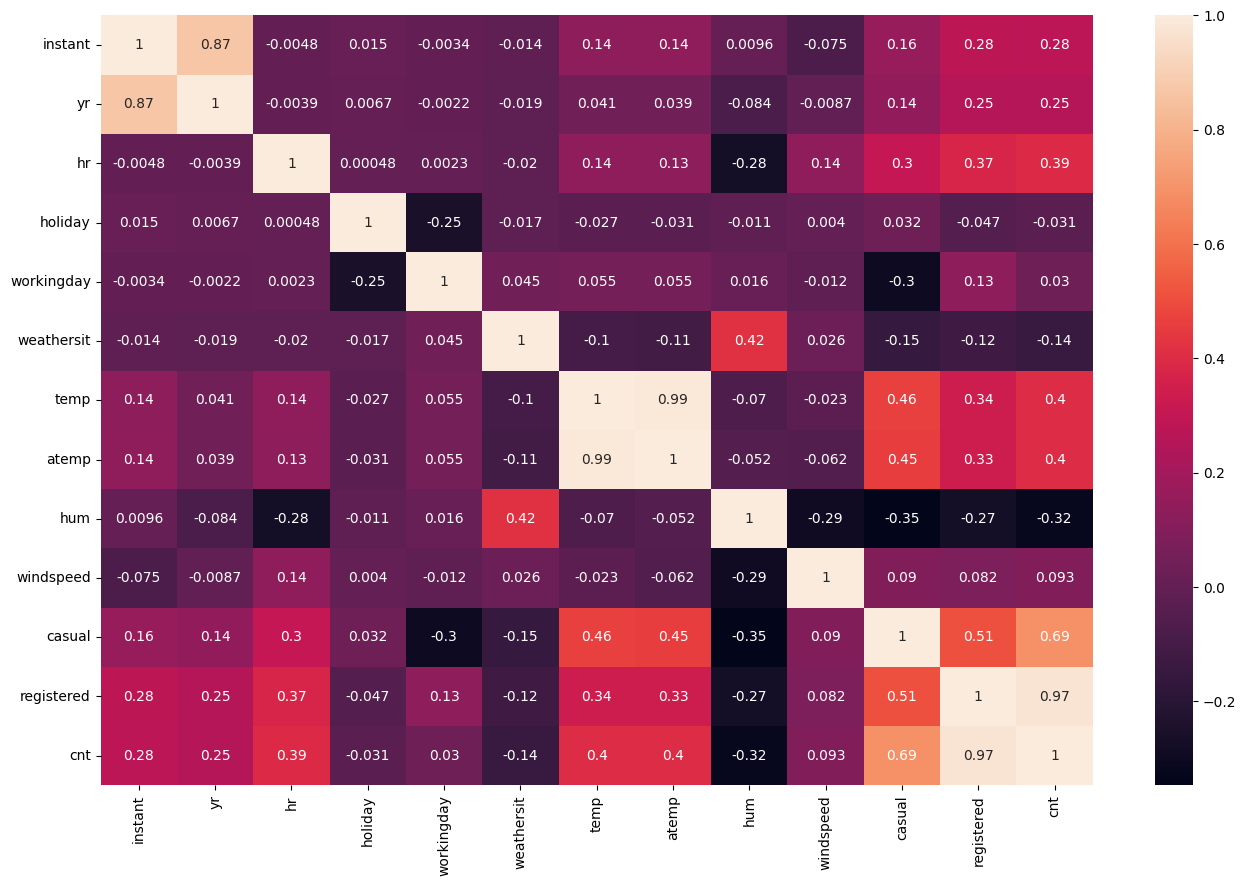

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

There is strong correlation between casual and registered variables vs. cnt, though this is expected since the increase in casual and registered users will affected cnt (total rides) directly.
There are moderate correlation between hr, temp and atemp vs count of bikeshare rides.

## 6. Visualization and Explanatory Data Analysis
---

In this chapter, we will answer the questions defined above.

1. How is the trend in the number of bike-sharing rides in recent years?
2. What is the usage pattern of bike-sharing rides based on time of day?
3. What season has the highest bike-sharing rides?
4. What is the usage pattern of bike-sharing rides based on day of the week?
5. Are there any correlations between temperatures that indicate conditions when bike-sharing rides are high?
6. Does weather affect bikeshare usage?

### A. What is the trend in the number of bike-sharing rides in recent years?

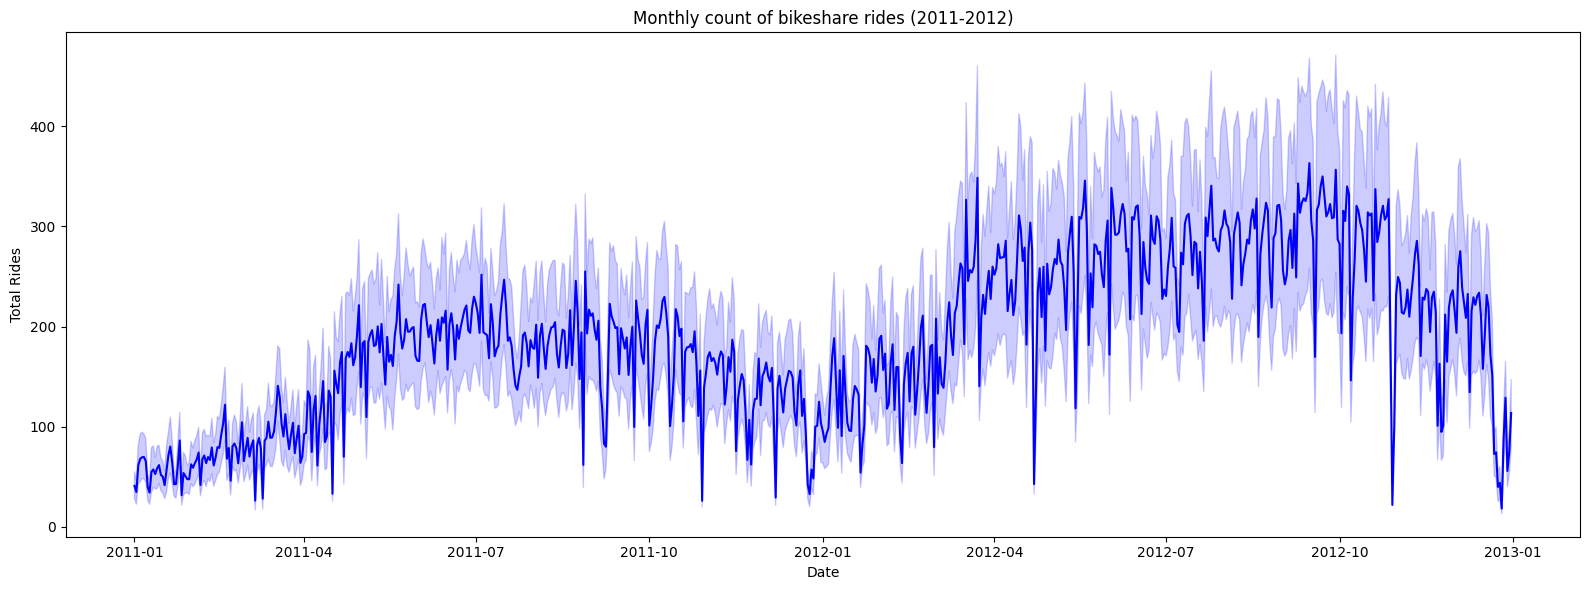

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="cnt", data=df, color='blue')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of bikeshare rides (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

To make it more interpretable, let's pivot it to monthly figure. Using `resample`, we will aggregate the time-series based data (from daily to monthly)

In [ ]:
monthly_users_df = df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

monthly_users_df.head(3)

,casual,registered,cnt
dteday,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045


In [ ]:
monthly_users_df.index = monthly_users_df.index.strftime('%b-%y')

In [ ]:
monthly_users_df.head(3)

,casual,registered,cnt
dteday,,,
Jan-11,3073,35116,38189
Feb-11,6242,41973,48215
Mar-11,12826,51219,64045


In [ ]:
monthly_users_df = monthly_users_df.reset_index()

In [ ]:
monthly_users_df = monthly_users_df.rename(columns={'dteday': 'yearmonth'})

In [ ]:
monthly_users_df.head()

,yearmonth,casual,registered,cnt
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821


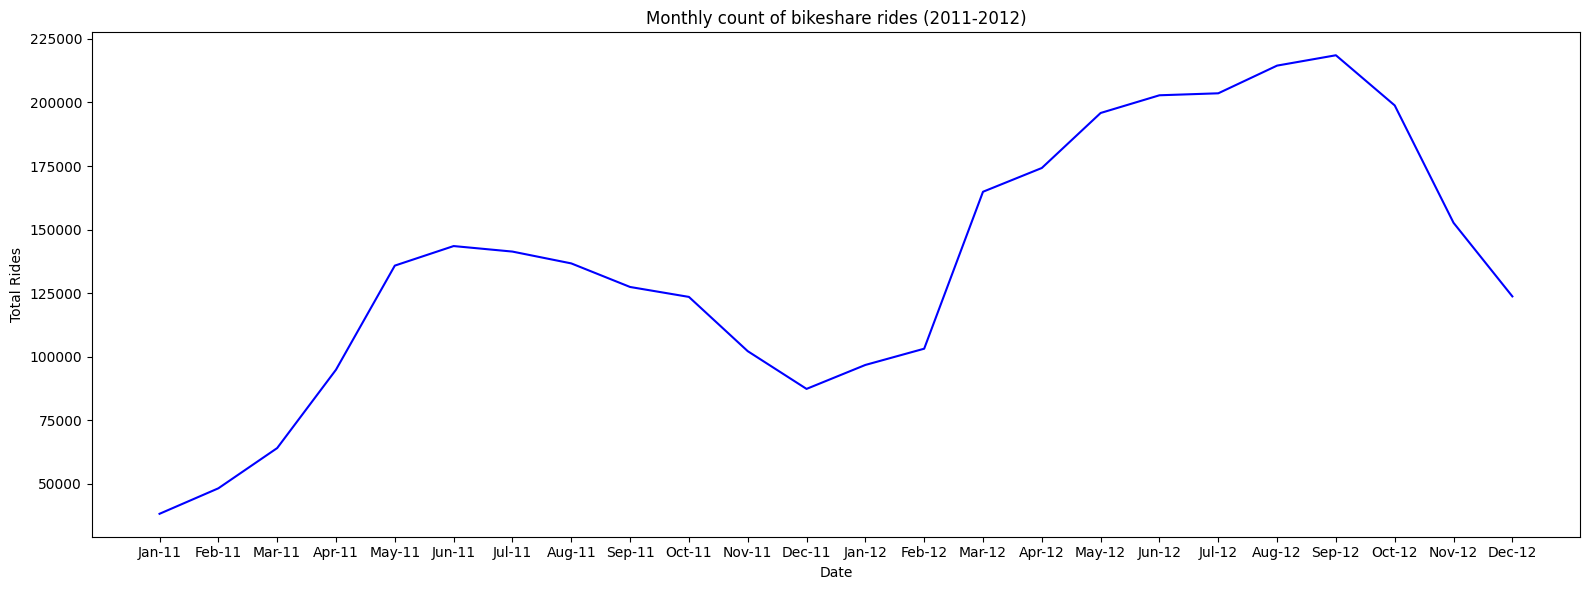

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="yearmonth", y="cnt", data=monthly_users_df, color='blue')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of bikeshare rides (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

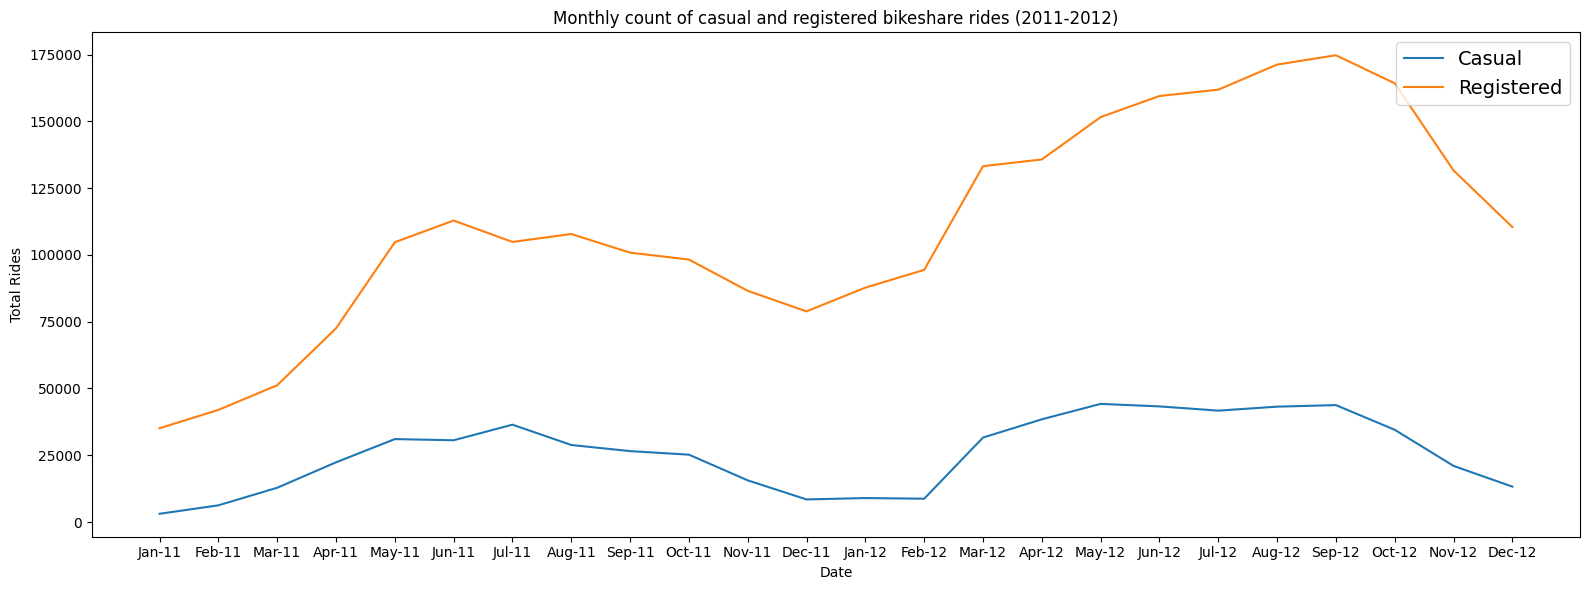

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="yearmonth", y="casual", data=monthly_users_df, label='Casual')
sns.lineplot(x="yearmonth", y="registered", data=monthly_users_df, label='Registered')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of casual and registered bikeshare rides (2011-2012)")

# Add a legend to the plot
plt.legend(loc='upper right', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

**Insight**
1. The count of bikeshare rides in 2012 are higher than in 2011.
2. We can see a seasonality in those 2 years. Count of bikeshare rides typically starts low in start of the year, then beginning to increase in Q2, then starts to decrease in Q4.
3. The count of registered bikeshare rides are higher than casual's, though both shows the same trend over the year.

### B. What is the usage pattern of bike-sharing rides based on time of day?

In [ ]:
hourly_users_df = df.groupby("hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

hourly_users_df.head()

,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428


In [ ]:
hourly_users_df = hourly_users_df.reset_index()

In [ ]:
hourly_users_df.head()

,hr,casual,registered,cnt
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428


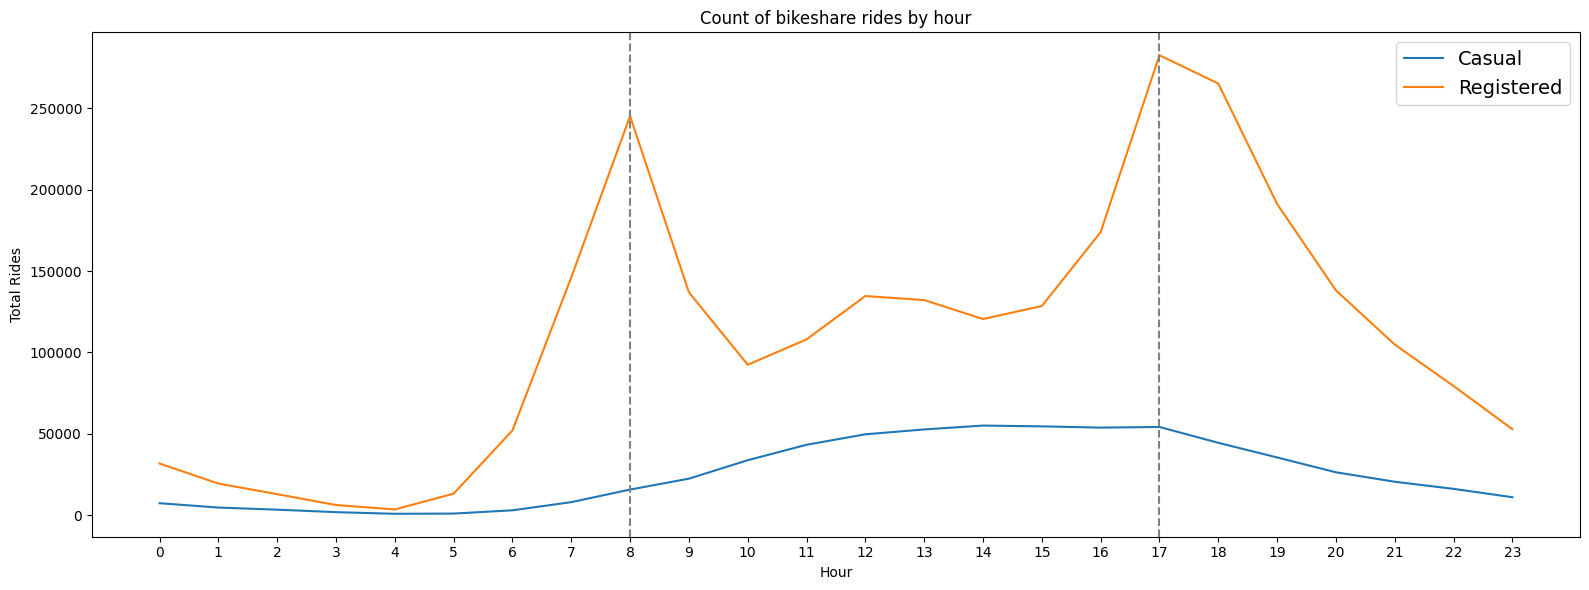

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="hr", y="casual", data=hourly_users_df, label='Casual')
sns.lineplot(x="hr", y="registered", data=hourly_users_df, label='Registered')

# Add labels and a title to the plot
x = np.arange(0, 24, 1)
plt.xticks(x)

plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by hour")

# highlight the important data label in the chart
plt.axvline(x=8, color='gray', linestyle='--')
plt.axvline(x=17, color='gray', linestyle='--')

# Add a legend to the plot
plt.legend(loc='upper right', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

**Insight**
1. The above chart shows very obvious different pattern on how casual and registered bikeshare rides differs based on hour in a day.
2. The registered bikeshare rides shows peak on 8.00 and 17.00. Given both these hours are time when people go to work and coming back from work, it's possible that registered bikeshare users use the bike to commute to work.
3. On the other hand, casual bikeshare rides shows higher frequency  during the day, then it starts to decrease after 17.00.

### C. What season has the highest bike-sharing rides?

In [ ]:
seasonly_users_df = df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

seasonly_users_df.head()

,casual,registered,cnt
season,,,
Fall,129782,711831,841613
Spring,203522,715067,918589
Summer,226091,835038,1061129
Winter,60622,410726,471348


In [ ]:
seasonly_users_df = seasonly_users_df.reset_index()

In [ ]:
seasonly_users_df

,season,casual,registered,cnt
0,Fall,129782,711831,841613
1,Spring,203522,715067,918589
2,Summer,226091,835038,1061129
3,Winter,60622,410726,471348


In [ ]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

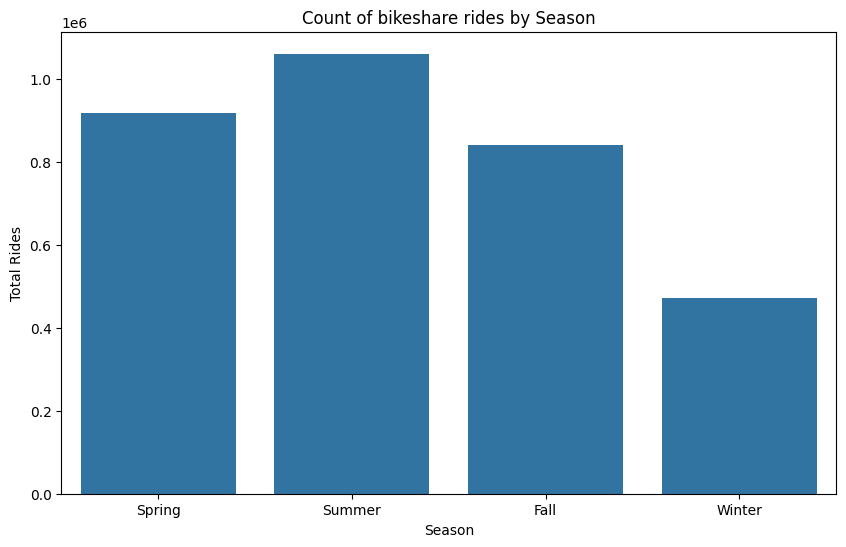

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x="season", y="cnt", data=seasonly_users_df, order=season_order)

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

- The count of bikeshare users are highest during Summer season, and lowest during Winter season.
- Further, to see the difference between casual and registered bikeshare users pattern in each season, we will unpivot the `season_users_df`

In [ ]:
seasonly_users_df_unpivoted = pd.melt(seasonly_users_df,
                                      id_vars=['season'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')

In [ ]:
seasonly_users_df_unpivoted

,season,status,count
0,Fall,casual,129782
1,Spring,casual,203522
2,Summer,casual,226091
3,Winter,casual,60622
4,Fall,registered,711831
5,Spring,registered,715067
6,Summer,registered,835038
7,Winter,registered,410726


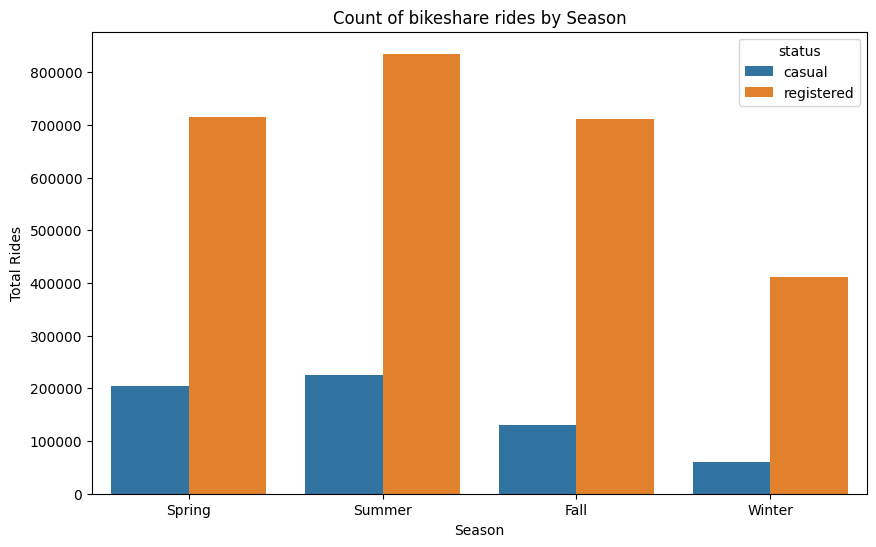

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='count', data=seasonly_users_df_unpivoted, order=season_order, hue='status')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

**Insight**
- The count of bikeshare rides are highest during Summer season, and lowest during Winter season.
- There are no major difference between casual and registered rides pattern during season, both are highest in Summer and lowest during Winter.

### C. What is the usage pattern of bikesharing rides based on day of the week?

In [ ]:
weekday_users_df = df.groupby("weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weekday_users_df

,casual,registered,cnt
weekday,,,
Friday,78238,409552,487790
Monday,70784,384719,455503
Saturday,153852,323955,477807
Sunday,140521,303506,444027
Thursday,61460,423935,485395
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048


In [ ]:
weekday_users_df = weekday_users_df.reset_index()

In [ ]:
weekday_users_df

,weekday,casual,registered,cnt
0,Friday,78238,409552,487790
1,Monday,70784,384719,455503
2,Saturday,153852,323955,477807
3,Sunday,140521,303506,444027
4,Thursday,61460,423935,485395
5,Tuesday,57843,411266,469109
6,Wednesday,57319,415729,473048


In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

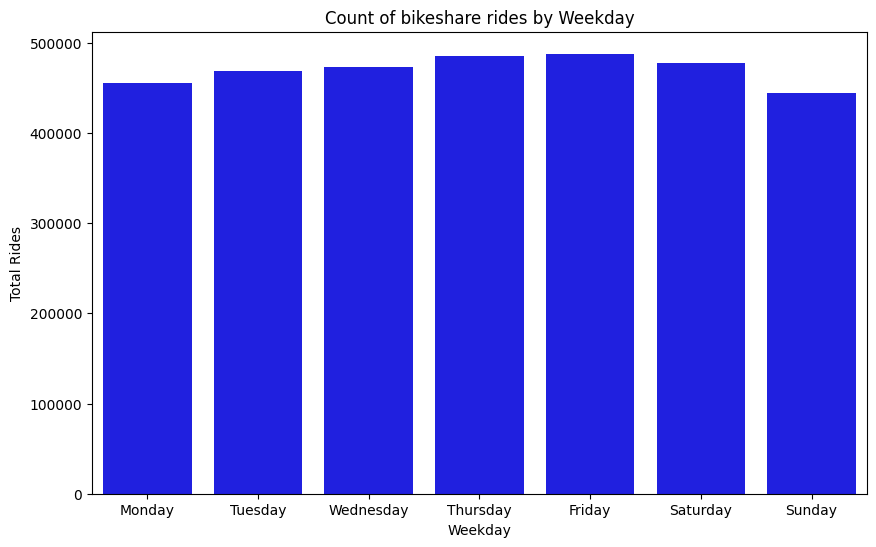

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x='weekday', y='cnt', data=weekday_users_df, order=day_order, color='blue')

plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weekday")

plt.show()

- It seems like the count of bikeshare users are spaced quite evenly during the weekday
- Further, to see the difference between casual and registered bikeshare users pattern during weekday, we will unpivot the `weekday_users_df`

In [ ]:
weekday_users_df_unpivoted = pd.melt(weekday_users_df,
                                      id_vars=['weekday'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')

In [ ]:
weekday_users_df_unpivoted

,weekday,status,count
0,Friday,casual,78238
1,Monday,casual,70784
2,Saturday,casual,153852
3,Sunday,casual,140521
4,Thursday,casual,61460
5,Tuesday,casual,57843
6,Wednesday,casual,57319
7,Friday,registered,409552
8,Monday,registered,384719
9,Saturday,registered,323955


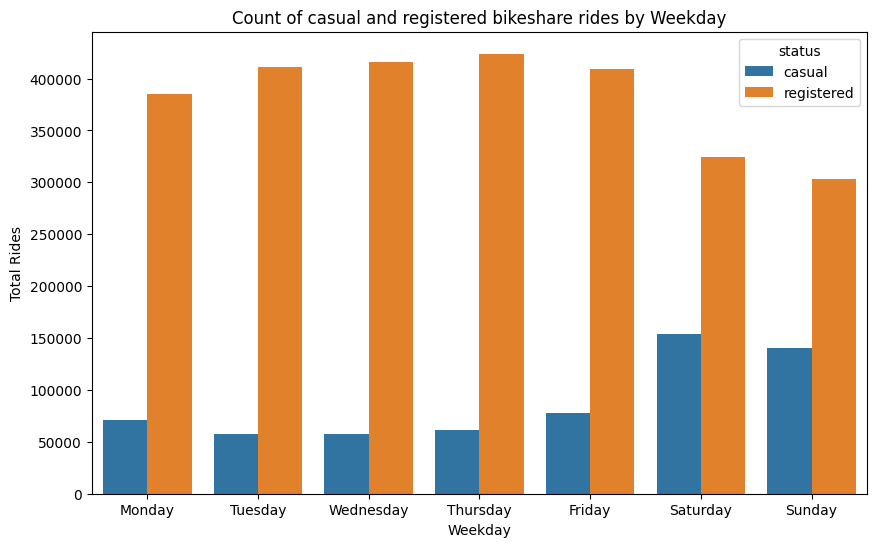

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x='weekday', y='count', data=weekday_users_df_unpivoted, order=day_order, hue='status')

plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of casual and registered bikeshare rides by Weekday")

plt.show()

**Insight**
1. When we separate the count of bikeshare rides between casual and registered users, we see an interesting pattern here.
2. The count of casual rides are higher on the weekend, while for registered rides are higher on the weekday.
3. Adding to the insight we found on hourly rides, this further supports that registered users probably used the bike for work routinely during weekday, while the casual users used the bike for casual leisure on weekend.

### E. Are there any correlations between temperatures that indicate conditions when bike-sharing rides are high?

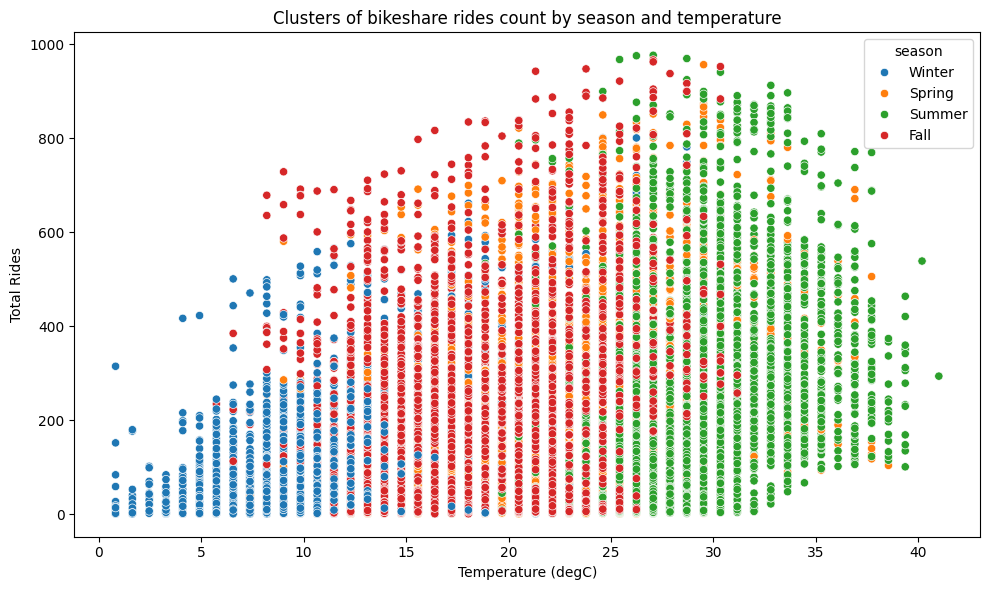

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='cnt', data=df, hue='season')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides count by season and temperature")

# Show the plot
plt.tight_layout()
plt.show()

**Insight**
1. In the chart above, during the time when temperature is lower, the count of bikeshare rides are also low. This happens during winter season.
2. When temperature is high, the count of bikeshare rides also increase. This happened during summer.
3. However, there seem to be a "sweet-spot" of temperature where the count of bikeshare rides are the highest. We can see it in the Fall and Summer season cluster. The "sweet-spot" of temperature are between 20degC to 30degC.
4. During the days with those temperature conditions, we can expect the count of bikeshare rides will be high.

### F. Does weather affect bikeshare usage?

Let's recall the weather situation in `weathersit` variable:

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
weatherly_users_df = df.groupby("weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weatherly_users_df

,casual,registered,cnt
weathersit,,,
1,462745,1875428,2338173
2,134481,661471,795952
3,22783,135548,158331
4,8,215,223


In [ ]:
weatherly_users_df = weatherly_users_df.reset_index()

In [ ]:
weatherly_users_df

,weathersit,casual,registered,cnt
0,1,462745,1875428,2338173
1,2,134481,661471,795952
2,3,22783,135548,158331
3,4,8,215,223


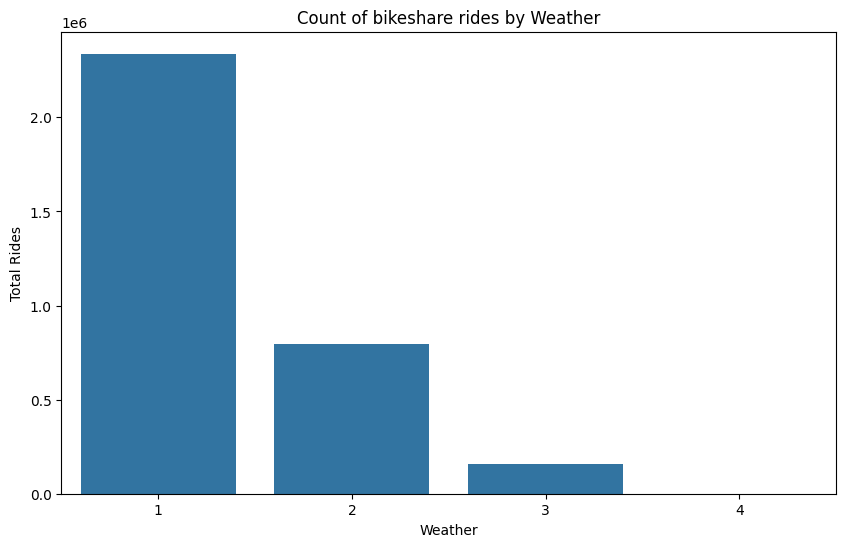

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x="weathersit", y="cnt", data=weatherly_users_df)

plt.xlabel("Weather")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weather")

plt.show()

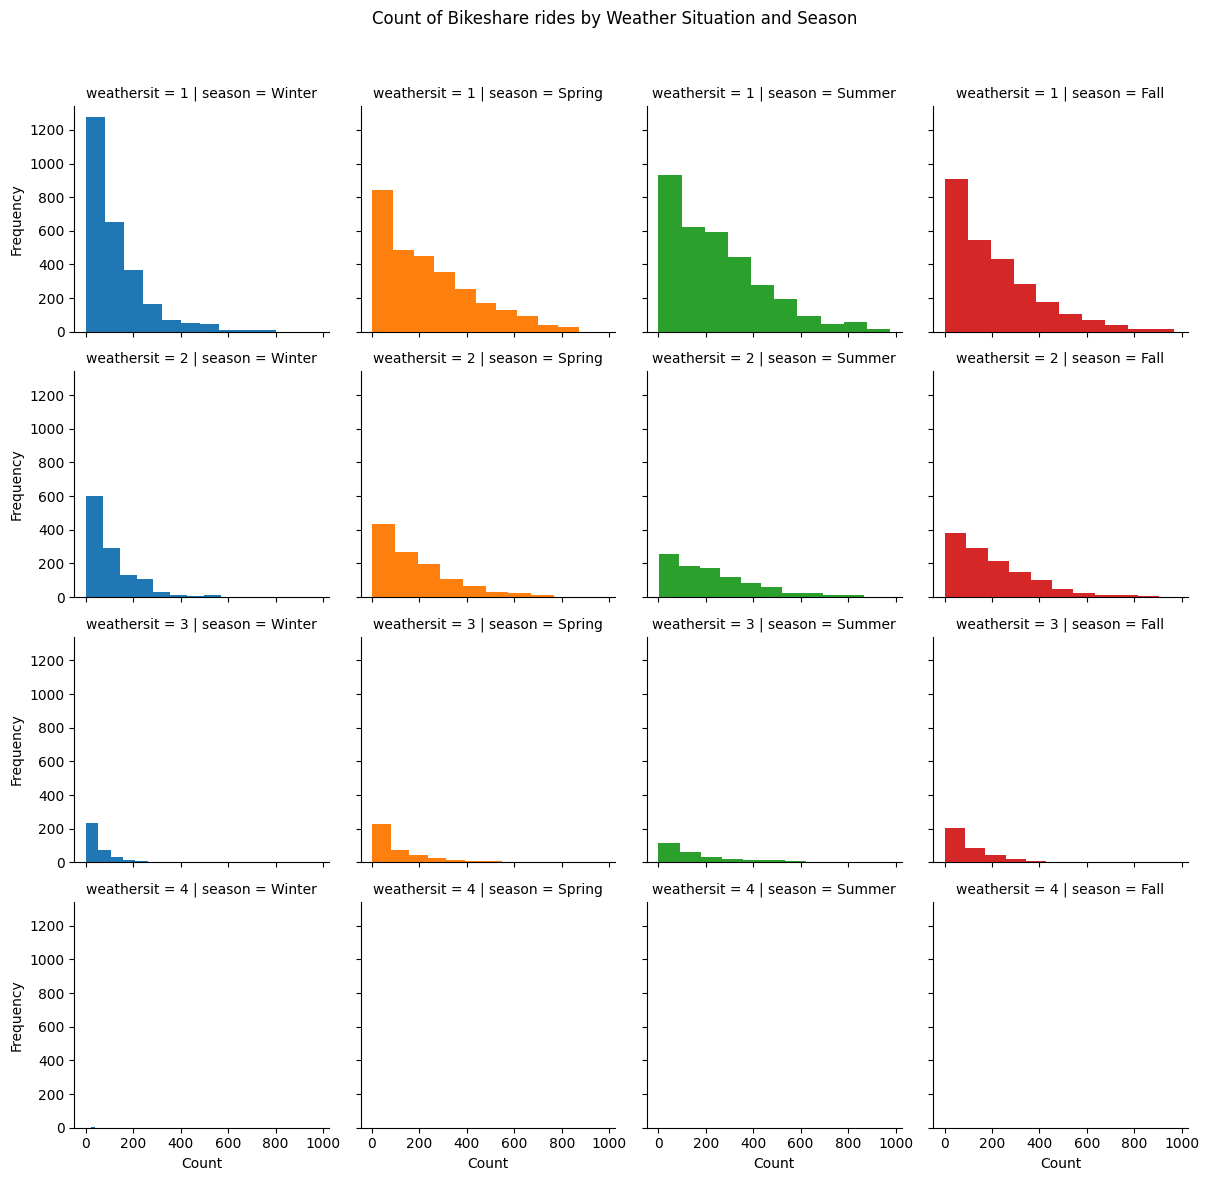

In [ ]:
plt.rcParams['figure.figsize'] = [10.0, 10.0]
sns.set_context(font_scale=0.9)

g = sns.FacetGrid(data=df,
               col='season',
               row='weathersit',hue='season')
g.map(plt.hist,'cnt')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Bikeshare rides by Weather Situation and Season')

g.set_xlabels('Count')
g.set_ylabels('Frequency')


**Insight**
1. The count of bikeshare rides usage are largely affected by weather conditions. There are significantly less rides during heavy rain and thunderstorms compared to nicer weathers.
2. This conditons hold true for all seasons.

## 7. Conclusion
---

### A. How is the trend in the number of bike-sharing rides in recent years?

> The number of bikeshare rides in 2012 was higher than in 2011. Both years showed the same trend and seasonality, with the number of rides increasing in the middle of the year and decreasing at the beginning and end of the year.

### B. What is the usage pattern of bike-sharing rides based on time of day?

> - For registered users, the number of rides peaked at 8:00 AM and 5:00 PM, suggesting that they may have used the bikes to commute to work.
> - For casual users, the number of rides started to increase during the day and decreased during the night.

### C. What season has the highest bike-sharing rides?

> Bikeshare rides were highest during the summer season and lowest during the winter season.

### D. What is the usage pattern of bike-sharing rides based on day of the week?

> - For registered users, the number of rides was higher during weekdays. This is consistent with the findings in question 2, suggesting that registered users likely used the bikes to commute to work.
> - For casual users, the number of rides was higher on weekends than on weekdays, indicating that they used the bikes for leisure activities on weekends.

### E. Are there any correlations between temperatures that indicate conditions when bike-sharing rides are high?

> - Yes, there is a moderate correlation between temperature and the number of bikeshare rides.
> - The number of rides is lowest at colder temperatures, which occur during the winter, and starts to increase as the temperature increases, which happens in the summer. However, there is a "sweet spot" or temperature range when the number of rides is highest, which is between 20°C and 30°C. This temperature range typically occurs during the summer and fall seasons.
> - On days with these temperature conditions, we can expect the number of bikeshare rides to be high.

### F. Does weather affect bikeshare usage?

> Yes, the number of rides is significantly higher during clear weather than during more extreme weather conditions.